# Task-3 Building a decision tree classifier
#### Now for making a decision tree we will use "bank marketing dataset" which has the important details about customers
#### We will predict weather customer will purchase a product or service based on their demographic & behavioural data
#### Installing some important packages for plotting decision tree

In [1]:
import pandas as pd 

In [2]:
pd.compat

<module 'pandas.compat' from 'C:\\Users\\HP\\anaconda3\\Lib\\site-packages\\pandas\\compat\\__init__.py'>

In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matrix

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Reading the dataset 

data = pd.read_csv('bank+marketing/bank/bank.csv',sep='[;, |_]' , engine = 'python' , header = None)

In [7]:
# checking shape of the dataset

data.shape

(4522, 17)

In [8]:
# checking datatypes of the dataset 

data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4522 non-null   object
 1   1       4522 non-null   object
 2   2       4522 non-null   object
 3   3       4522 non-null   object
 4   4       4522 non-null   object
 5   5       4522 non-null   object
 6   6       4522 non-null   object
 7   7       4522 non-null   object
 8   8       4522 non-null   object
 9   9       4522 non-null   object
 10  10      4522 non-null   object
 11  11      4522 non-null   object
 12  12      4522 non-null   object
 13  13      4522 non-null   object
 14  14      4522 non-null   object
 15  15      4522 non-null   object
 16  16      4522 non-null   object
dtypes: object(17)
memory usage: 600.7+ KB


#### Here we can see that we do not have mising values so we do not need to deal with missing values

In [10]:
# checking some records of the dataset 

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
1,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
2,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""
3,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no"""
4,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no"""


#### here i can see that some changes need to do in the records ( need to remove inverted comma)


In [11]:
# checking statistical terms of the records 

data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522
unique,68,13,4,5,3,2354,3,3,4,32,13,876,33,293,25,5,3
top,34,"""management""","""married""","""secondary""","""no""",0,"""yes""","""no""","""cellular""",20,"""may""",123,1,-1,0,"""unknown""","""no"""
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


In [12]:
# checking column names 

data.columns.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [13]:
# As we can see that some extra chaarcters are present in column so first we need to deal with it

for i in data.columns:
    data[i] = data[i].str.strip('"')

In [14]:
# after removing checking the data 

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [15]:
# As we can see that column names are showing as values so making it as column name 

data.columns = data.iloc[0]
data = data.reindex(data.index.drop(0)).reset_index(drop=True)
data.columns.name = None

In [16]:
# checking the data 

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


#### We cant plot decision tree with categorical columns so changing it into numerical columns

In [17]:
# checking value counts of column 'job' 

data['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [18]:
# changing this values with numeric ones 

pd.set_option('future.no_silent_downcasting', True)

data['job'] = data['job'].replace({'management':1,'blue-collar':2,'technician':3,'admin.':4,'services':5,'retired':6,'self-employed':7,'entrepreneur':8,'unemployed':9,'housemaid':10,'student':11,'unknown':12})

In [19]:
# checking value counts of column 'marital'

data['marital'].value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [20]:
# changing this values with numeric ones

pd.set_option('future.no_silent_downcasting', True)
data['marital'] = data['marital'].replace({'married':1,'single':2,'divorced':3})

In [21]:
# checking value counts of column 'education'

data['education'].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [22]:
# changing this values with numeric ones

data['education'] = data['education'].replace({'secondary':2,'primary':1,'tertiary':3,'unknown':4})

In [23]:
# checking value counts of column 'housing'

data['housing'].value_counts()

housing
yes    2559
no     1962
Name: count, dtype: int64

In [24]:
# changing this values with numeric ones

data['housing'] = data['housing'].replace({'yes':1,'no':2})

In [25]:
# checking value counts of column 'default'

data['default'].value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

In [26]:
# changing this values with numeric ones

data['default'] = data['default'].replace({'yes':1,'no':2})

In [27]:
# checking value counts of column 'loan'

data['loan'].value_counts()

loan
no     3830
yes     691
Name: count, dtype: int64

In [28]:
# changing this values with numeric ones

data['loan'] = data['loan'].replace({'yes':1,'no':2})

In [29]:
# checking value counts of column 'contact'

data['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [30]:
# changing this values with numeric ones

data['contact'] = data['contact'].replace({'cellular':1,'unknown':2,'telephone':3})

In [31]:
# checking value counts of column 'month'

data['month'].value_counts()

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

In [32]:
# changing this values with numeric ones

data['month'] = data['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [33]:
# checking value counts of column 'poutcome'

data['poutcome'].value_counts()

poutcome
unknown    3705
failure     490
other       197
success     129
Name: count, dtype: int64

In [34]:
# changing this values with numeric ones

data['poutcome'] = data['poutcome'].replace({'unknown':1,'failure':2,'success':3,'other':4})

In [35]:
# checking the data 

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,9,1,1,2,1787,2,2,1,19,10,79,1,-1,0,1,no
1,33,5,1,2,2,4789,1,1,1,11,5,220,1,339,4,2,no
2,35,1,2,3,2,1350,1,2,1,16,4,185,1,330,1,2,no
3,30,1,1,3,2,1476,1,1,2,3,6,199,4,-1,0,1,no
4,59,2,1,2,2,0,1,2,2,5,5,226,1,-1,0,1,no


In [36]:
# dropping column 'y' for train test split 

X = data.drop('y' , axis = 1)

In [37]:
# making a variable named 'y' as a target variable 

y = data['y']

In [38]:
# checking the shape of the data 

X.shape

(4521, 16)

In [39]:
# checking the shape of the data

y.shape

(4521,)

In [40]:
# checking the value count of the data

y.value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [41]:
y

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4521, dtype: object

In [42]:
# checking head of the variable 'x'

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,9,1,1,2,1787,2,2,1,19,10,79,1,-1,0,1
1,33,5,1,2,2,4789,1,1,1,11,5,220,1,339,4,2
2,35,1,2,3,2,1350,1,2,1,16,4,185,1,330,1,2
3,30,1,1,3,2,1476,1,1,2,3,6,199,4,-1,0,1
4,59,2,1,2,2,0,1,2,2,5,5,226,1,-1,0,1


In [43]:
# Importing required packages for visualization

from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from IPython.display import Image

%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
from IPython.display import Image
from io import StringIO 
from sklearn import tree
import pydotplus , graphviz , pyplus
from PIL import Image

import sys
sys.modules['sklearn.externals.six'] = 'six'
from six import StringIO
from sklearn.tree import export_graphviz

In [44]:
# making variable for train test split 

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,random_state = 42)

In [45]:
# checking shape of the data 

X_train.shape

(3164, 16)

In [46]:
# checking shape of the data

X_test.shape

(1357, 16)

In [47]:
# checking shape of the data

y_train.shape

(3164,)

In [48]:
# checking shape of the data

y_test.shape

(1357,)

#### Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [49]:
dt = DecisionTreeClassifier(max_depth = 3)

In [50]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
dot_data = StringIO()

In [52]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,9,1,1,2,1787,2,2,1,19,10,79,1,-1,0,1
1,33,5,1,2,2,4789,1,1,1,11,5,220,1,339,4,2
2,35,1,2,3,2,1350,1,2,1,16,4,185,1,330,1,2
3,30,1,1,3,2,1476,1,1,2,3,6,199,4,-1,0,1
4,59,2,1,2,2,0,1,2,2,5,5,226,1,-1,0,1


In [53]:
pip install pydot 

In [54]:
import pydot 

In [55]:
import os

# Set path to Graphviz's dot executable if necessary


os.environ["GRAPHVIZ_DOT"] = r"C:\Users\HP\Downloads\graphviz-12.2.1"  # Update this path to where Graphviz's dot is located

import pydotplus
from PIL import Image
import io

In [56]:
from sklearn import tree
import pydotplus
from PIL import Image
import io

# plotting tree with max_depth=3

dot_data = io.StringIO()
tree.export_graphviz(
    dt, 
    out_file=dot_data, 
    filled=True, 
    rounded=True, 
    special_characters=True, 
    feature_names=X.columns, 
    class_names=['subscribed', 'not subscribed']
)

# Generate the graph from the dot data

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Generate and show the image
png_data = graph.create_png()

png_bytes_io = io.BytesIO(png_data)

# Open the image using PIL and display it

image = Image.open(png_bytes_io)
image.show()


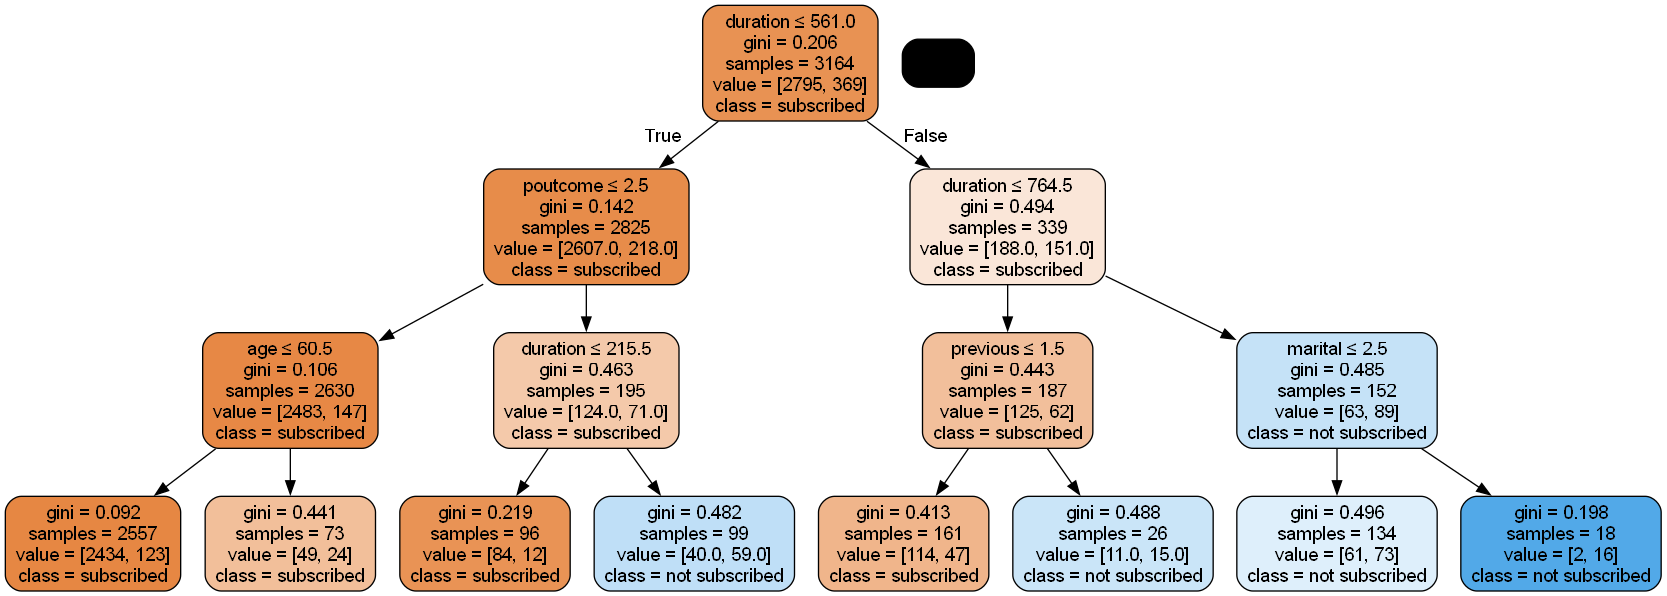

In [57]:
Image.open(png_bytes_io)

# Insights -

#### 1. Here we can see that duration is the main factor which is responsible for client will purchase a service or not.
#### so by seeing the decision tree we can conclude that higher the duration of the call there will be higher the chances
#### that customer will purchase service but after at some point it becomes constant so there is a chance to not purchase the services.
#### 2. 'poutcome' is the factor which is responsible means 'outcome of the previous marketing campaign',so here poutcome comes '2.5' means it comes
#### under campaign became success & failure ,so there is a high chance that customer will purchase a service.
#### 3. Age is also a responsible factor means who didn't retired they have more chances to purchase a product.
#### 4. Marital status of aperson may not define more that marital stuatus of a person will not affect much in that scenario

# Conclusion -

#### We can conclude about important factors for identifying that customer will purchase a service or not are -
#### Duration of a call Outcome of a campaign
#### Age of a customer
#### Marital status of a person